# TED talks

- hide: false
- toc: true
- comments: true
- categories: [python, pandas]

Analysing TED talks following [this] talk.

In [3]:
import pandas as pd

In [204]:
path = 'https://raw.githubusercontent.com/justmarkham/pycon-2019-tutorial/master/ted.csv'
ted = pd.read_csv(path)
ted.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520


In [5]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [9]:
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

## Which talks provoke the most online discussion?

In [32]:
ted['views_per_comment'] = ted.views / ted.comments
vpc = ted.sort_values('views_per_comment')[['name', 'main_speaker', 'views_per_comment']]
display(vpc.head())
display(vpc.tail())

,name,main_speaker,views_per_comment
744,Diane J. Savino: The case for same-sex marriage,Diane J. Savino,450.531587
803,David Bismark: E-voting without fraud,David Bismark,651.739808
96,Richard Dawkins: Militant atheism,Richard Dawkins,683.134291
694,Sharmeen Obaid-Chinoy: Inside a school for sui...,Sharmeen Obaid-Chinoy,703.886818
954,Janet Echelman: Taking imagination seriously,Janet Echelman,735.525682


,name,main_speaker,views_per_comment
2494,Jimmy Lin: A simple new blood test that can ca...,Jimmy Lin,143643.714286
2528,Chance Coughenour: How your pictures can help ...,Chance Coughenour,179735.666667
2542,Sethembile Msezane: Living sculptures that sta...,Sethembile Msezane,180696.000000
2501,Françoise Mouly: The stories behind The New Yo...,Françoise Mouly,279680.000000
2534,Benjamin Grant: What it feels like to see Eart...,Benjamin Grant,323087.000000


# Plot the distribution of comments

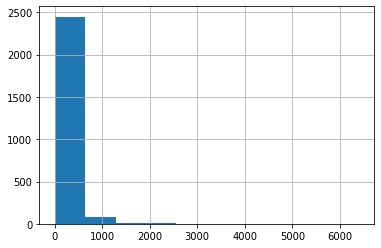

In [132]:
ted.comments.hist();

In [34]:
ted[ted.comments >= 1500].shape

(17, 19)

Most talks have fewer than 1500 comments (only 17 have more), so I drop the ones that have more. I initially tried to avoid this, but as Keving points out in the video: plotting entails decision making, as a plot is a summary of your data and not a representation of all your data. This is a good lesson to take away from this.

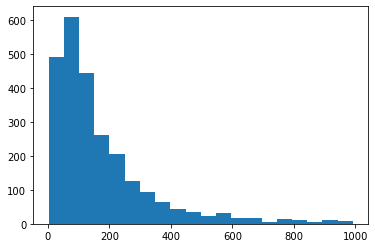

In [35]:
ted.loc[ted.comments < 1000, 'comments'].hist(bins=20, grid=False);

## Plot the number of talks that took place each year

In [45]:
ted.published_date

744     1282062180
803     1288685640
96      1176689220
694     1274865960
954     1307489760
           ...    
2494    1500994384
2528    1504209631
2542    1505488093
2501    1501770244
2534    1504814438
Name: published_date, Length: 2550, dtype: int64

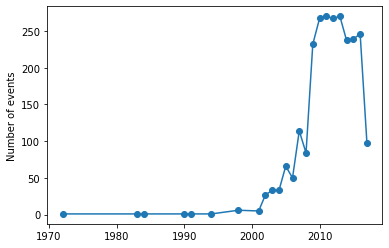

In [79]:
(pd.to_datetime(ted.film_date, unit='s').dt.year
 .value_counts()
 .sort_index()
 .plot(marker='o', ylabel='Number of events'));

# What were the "best" events in TED history to attend

Defining "best" as event with most overall views, this is simple

In [98]:
ted.groupby('event').views.sum().sort_values(ascending=False)[:5]

event
TED2013           177307937
TED2014           174121423
TEDGlobal 2013    170554736
TED2015           150826305
TED2006           147345533
Name: views, dtype: int64

# Unpack the ratings data

In [205]:
ted.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [206]:
import ast
ast.literal_eval(ted.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [207]:
ted['ratings'] = ted.ratings.apply(ast.literal_eval)

pieces = []
for idx, talk in ted.iterrows():
    df = pd.DataFrame(talk['ratings'])
    df['talk_name'] = talk['name']
    pieces.append(df)
    
ratings = pd.concat(pieces)
ratings.head()

,id,name,count,talk_name
0,7,Funny,19645,Ken Robinson: Do schools kill creativity?
1,1,Beautiful,4573,Ken Robinson: Do schools kill creativity?
2,9,Ingenious,6073,Ken Robinson: Do schools kill creativity?
3,3,Courageous,3253,Ken Robinson: Do schools kill creativity?
4,11,Longwinded,387,Ken Robinson: Do schools kill creativity?


# Count total number of ratings received by each talk

In [208]:
def counter(list_of_dics):
    return sum(a['count'] for a in list_of_dics)

ted.ratings.apply(counter)

0       93850
1        2936
2        2824
3        3728
4       25620
        ...  
2545      192
2546      151
2547      136
2548      583
2549      142
Name: ratings, Length: 2550, dtype: int64